In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']

In [2]:
num_jobs = 100  # 每次模拟的作业数量
num_simulations = 10  # 平均模拟次数
load_factors = np.linspace(0, 3, 30)  # 模拟的负载因子范围
Tr_values = [0.2, 0.5, 1]  # LTEDF算法的Tr值
base_deadline_factor = 1  # EDF的基准截止时间因子

def simulate_scheduling(load_factor, Tr, adjust_deadline):
    miss_rate = np.zeros(len(Tr_values) + 1)  # 初始化EDF和每个Tr值的错失率
    for sim in range(num_simulations):
        # 生成随机执行时间和截止时间的作业
        execution_times = np.random.exponential(scale=1/load_factor, size=num_jobs)
        deadlines = execution_times * (base_deadline_factor + np.random.rand(num_jobs))

        for i, Tr_value in enumerate([None] + Tr_values):
            # 复制原始截止时间以进行调整
            adjusted_deadlines = np.copy(deadlines)
            
            if Tr_value is not None and adjust_deadline:
                # 根据LTEDF算法调整截止时间
                adjustment_factors = 1 + np.random.uniform(0, Tr_value, size=num_jobs)
                adjusted_deadlines *= adjustment_factors
            
            # 根据截止时间排序作业并计算错失率
            sorted_indices = np.argsort(adjusted_deadlines)
            time = 0
            misses = 0
            for job_index in sorted_indices:
                time += execution_times[job_index]
                if time > adjusted_deadlines[job_index]:
                    misses += 1
            miss_rate[i] += misses / num_jobs
    return miss_rate / num_simulations

In [3]:
miss_rates_edf,miss_rates_ltedf_tr_02,miss_rates_ltedf_tr_05,miss_rates_ltedf_tr_1 = simulate_scheduling(load_factor, Tr, adjust_deadline)

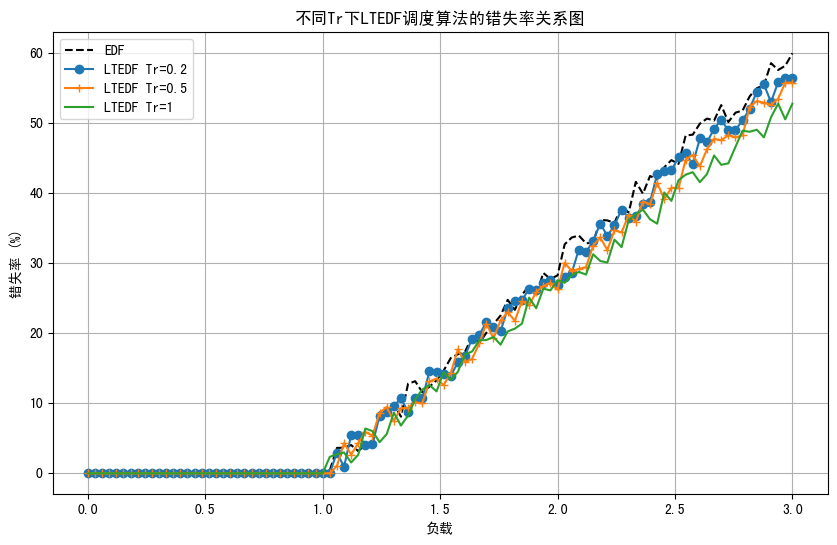

In [4]:
# 绘图
plt.figure(figsize=(10, 6))
plt.plot(loads, miss_rates_edf, 'k--', label='EDF')
plt.plot(loads, miss_rates_ltedf_tr_02, 'o-', label='LTEDF Tr=0.2')
plt.plot(loads, miss_rates_ltedf_tr_05, '+-', label='LTEDF Tr=0.5')
plt.plot(loads, miss_rates_ltedf_tr_1, label='LTEDF Tr=1')

plt.xlabel('负载')
plt.ylabel('错失率 (%)')
plt.title('不同Tr下LTEDF调度算法的错失率关系图')
plt.legend()
plt.grid(True)
plt.show()